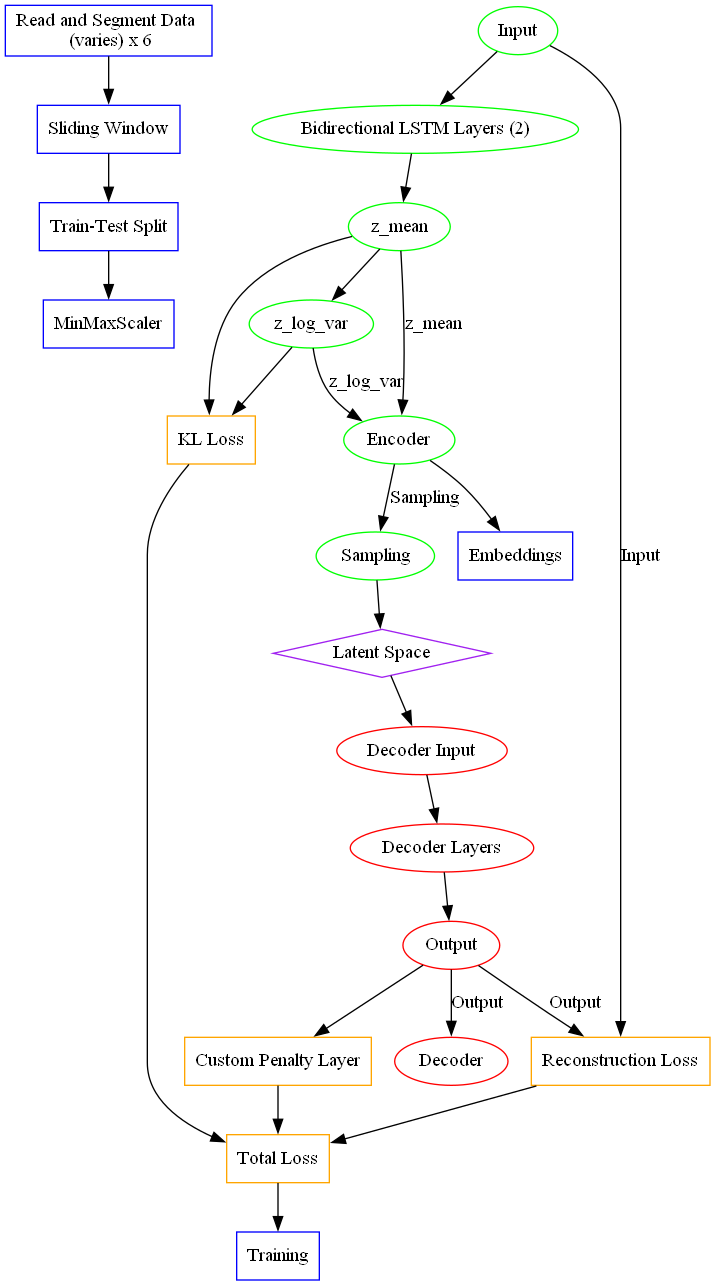

In [15]:
from graphviz import Digraph

dot = Digraph()
# dot.attr(rankdir='LR')

# Data Preprocessing
dot.node('A', 'Read and Segment Data \n ((varies) x 6)', shape='box', color='blue')
dot.node('B', 'Sliding Window \n (108 x 7816 x 6)', shape='box', color='blue')
dot.node('C', 'Train-Test Split \n (80 train, 20 test) \n (86 x 7816 x 6) \n (22 x 7816 x 6)', shape='box', color='blue')
dot.node('D', 'MinMaxScaler', shape='box', color='blue')

# Encoder
dot.node('E', 'Input \n (None x 7815 x 6)', shape='ellipse', color='green')
dot.node('F', 'Bidirectional LSTM Layers (2) \n  First (None x 7816 x 128) \n Second (None x 64))', shape='ellipse', color='green')
dot.node('G', 'z_mean \n (None x 2)', shape='ellipse', color='green')
dot.node('H', 'z_log_var \n (None x 2)', shape='ellipse', color='green')
dot.node('I', 'Sampling', shape='ellipse', color='green')
dot.node('J', 'Encoder \n (None x 2)', shape='ellipse', color='green')

# Latent Space
dot.node('K', 'Latent Space \n (None x 2)', shape='diamond', color='purple')

# Decoder
dot.node('L', 'Decoder Input \n (None x 2)', shape='ellipse', color='red')
dot.node('M', 'Decoder Layers \n Dense (None x 250112) \n Reshape (None x 7816 x 32) \n LSTM (None x 7816 x 64) \n TDistributed (None x 7816 x 6)', shape='ellipse', color='red')
# VAE model
dot.node('encoder', 'Encoder', shape='ellipse', color='black')
dot.node('N', 'Output', shape='ellipse', color='red')
dot.node('O', 'Decoder', shape='ellipse', color='red')

# Loss and Penalty
dot.node('P', 'Reconstruction Loss', shape='box', color='orange')
dot.node('Q', 'KL Loss', shape='box', color='orange')
dot.node('R', 'Custom Penalty Layer', shape='box', color='orange')
dot.node('S', 'Total Loss', shape='box', color='orange')

# Training
dot.node('T', 'Training', shape='box', color='blue')

# Embeddings
dot.node('U', 'Embeddings', shape='box', color='blue')

# Data Preprocessing edges
dot.edges(['AB', 'BC', 'CD'])

# Encoder edges
dot.edges(['EF', 'FG', 'GH'])
dot.edge('G', 'J', label='z_mean')
dot.edge('H', 'J', label='z_log_var')
dot.edge('J', 'I', label='Sampling')

# Latent Space edges
dot.edge('I', 'K')

# Decoder edges
dot.edge('K', 'L')
dot.edge('L', 'M')
dot.edge('M', 'N')
dot.edge('N', 'O', label='Output')

# Loss and Penalty edges
dot.edge('E', 'P', label='Input')
dot.edge('N', 'P', label='Output')
dot.edge('G', 'Q')
dot.edge('H', 'Q')
dot.edge('N', 'R')
dot.edge('P', 'S')
dot.edge('Q', 'S')
dot.edge('R', 'S')

# Training edges
dot.edge('S', 'T')

# Embeddings edges
dot.edge('J', 'U')

dot.render('detailed_architecture_colored.gv', format='png', cleanup=True)
from IPython.display import Image
Image(filename='detailed_architecture_colored.gv.png')

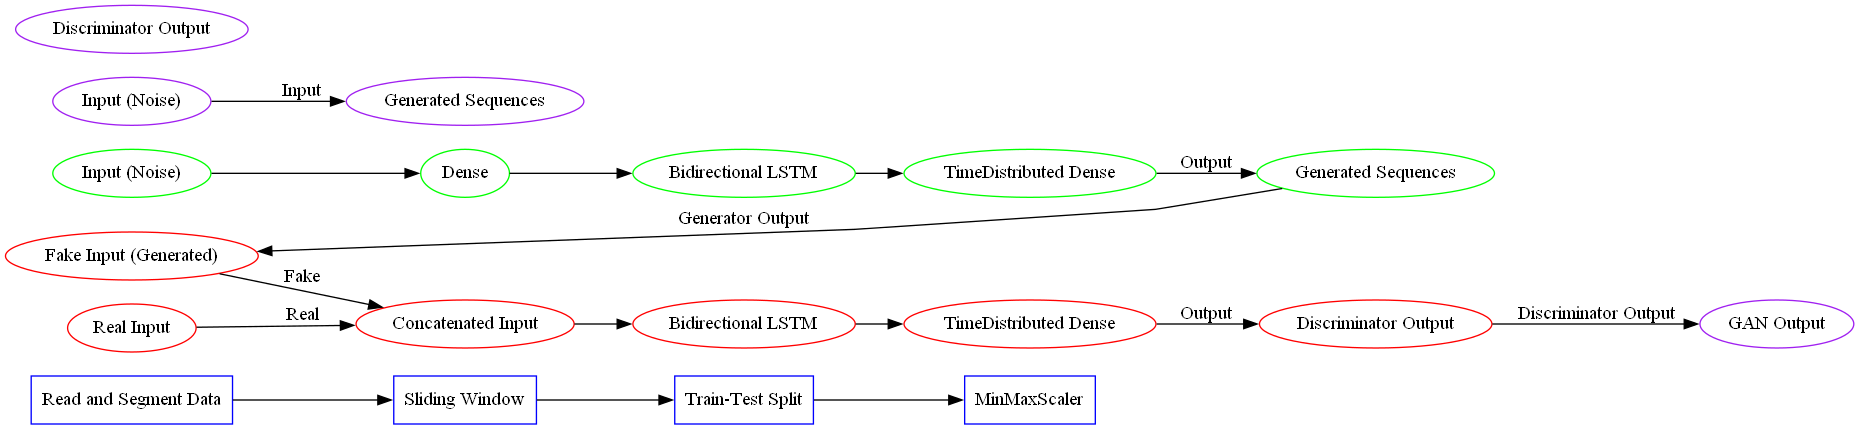

In [14]:
from graphviz import Digraph

dot = Digraph()
dot.attr(rankdir='LR', splines='polyline')

# Data Preprocessing
dot.node('A', 'Read and Segment Data', shape='box', color='blue')
dot.node('B', 'Sliding Window', shape='box', color='blue')
dot.node('C', 'Train-Test Split', shape='box', color='blue')
dot.node('D', 'MinMaxScaler', shape='box', color='blue')

# Generator
dot.node('E', 'Input (Noise)', shape='ellipse', color='green')
dot.node('F', 'Dense', shape='ellipse', color='green')
dot.node('G', 'Bidirectional LSTM', shape='ellipse', color='green')
dot.node('H', 'TimeDistributed Dense', shape='ellipse', color='green')
dot.node('I', 'Generated Sequences', shape='ellipse', color='green')

# Discriminator
dot.node('J', 'Real Input', shape='ellipse', color='red')
dot.node('K', 'Fake Input (Generated)', shape='ellipse', color='red')
dot.node('L', 'Concatenated Input', shape='ellipse', color='red')
dot.node('M', 'Bidirectional LSTM', shape='ellipse', color='red')
dot.node('N', 'TimeDistributed Dense', shape='ellipse', color='red')
dot.node('O', 'Discriminator Output', shape='ellipse', color='red')

# GAN
dot.node('P', 'Input (Noise)', shape='ellipse', color='purple')
dot.node('Q', 'Generated Sequences', shape='ellipse', color='purple')
dot.node('R', 'Discriminator Output', shape='ellipse', color='purple')
dot.node('S', 'GAN Output', shape='ellipse', color='purple')

# Data Preprocessing edges
dot.edges(['AB', 'BC', 'CD'])

# Generator edges
dot.edges(['EF', 'FG', 'GH'])
dot.edge('H', 'I', label='Output')

# Discriminator edges
dot.edge('J', 'L', label='Real')
dot.edge('K', 'L', label='Fake')
dot.edges(['LM', 'MN'])
dot.edge('N', 'O', label='Output')

# GAN edges
dot.edge('I', 'K', label='Generator Output', constraint='false')
dot.edge('P', 'Q', label='Input')
dot.edge('O', 'S', label='Discriminator Output')

dot.render('gan_architecture_wide_LR.gv', format='png', cleanup=True)
from IPython.display import Image
Image(filename='gan_architecture_wide_LR.gv.png')


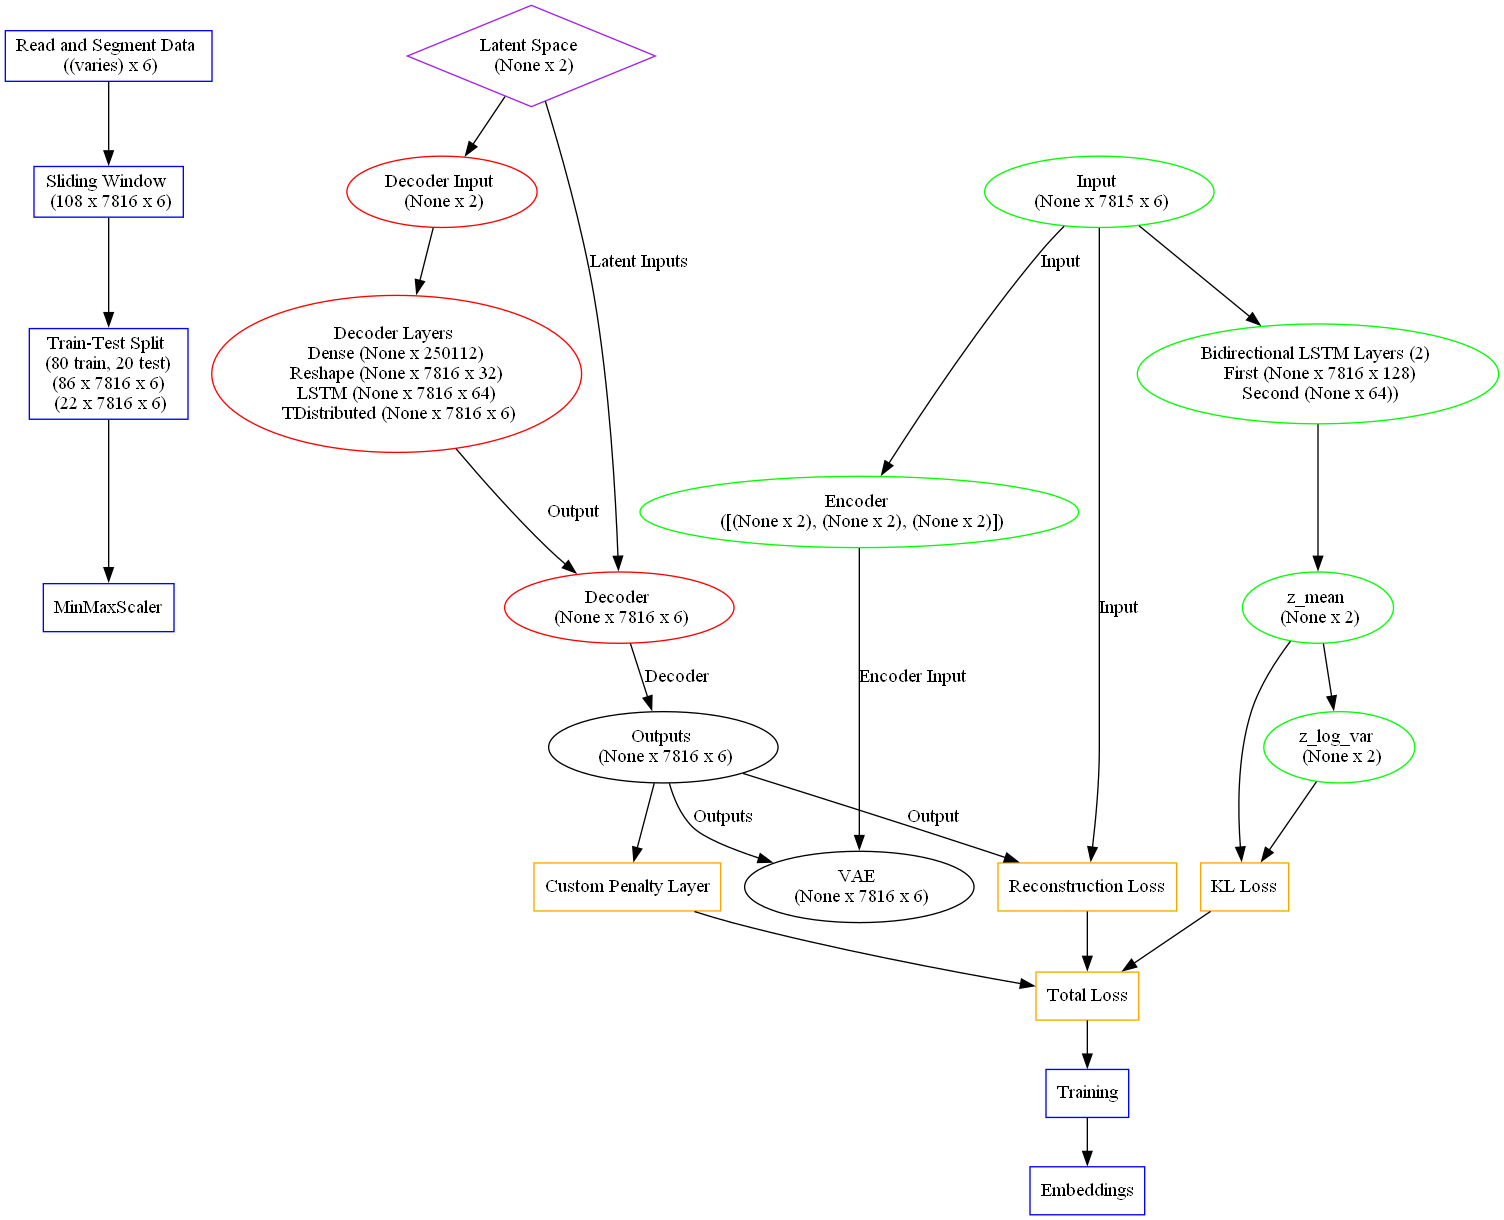

In [27]:
from graphviz import Digraph

dot = Digraph()
# dot.attr(rankdir='LR')

# Data Preprocessing
dot.node('A', 'Read and Segment Data \n ((varies) x 6)', shape='box', color='blue')
dot.node('B', 'Sliding Window \n (108 x 7816 x 6)', shape='box', color='blue')
dot.node('C', 'Train-Test Split \n (80 train, 20 test) \n (86 x 7816 x 6) \n (22 x 7816 x 6)', shape='box', color='blue')
dot.node('D', 'MinMaxScaler', shape='box', color='blue')

# Encoder
dot.node('E', 'Input \n (None x 7815 x 6)', shape='ellipse', color='green')
dot.node('F', 'Bidirectional LSTM Layers (2) \n  First (None x 7816 x 128) \n Second (None x 64))', shape='ellipse', color='green')
dot.node('G', 'z_mean \n (None x 2)', shape='ellipse', color='green')
dot.node('H', 'z_log_var \n (None x 2)', shape='ellipse', color='green')
# dot.node('I', 'Sampling', shape='ellipse', color='green')

# VAE model
dot.node('encoder', 'Encoder \n ([(None x 2), (None x 2), (None x 2)])', shape='ellipse', color='green')
dot.node('decoder', 'Decoder \n (None x 7816 x 6)', shape='ellipse', color='red')
dot.node('outputs', 'Outputs \n (None x 7816 x 6)', shape='ellipse', color='black')
dot.node('vae', 'VAE \n (None x 7816 x 6)', shape='ellipse', color='black')

# Latent Space
dot.node('K', 'Latent Space \n (None x 2)', shape='diamond', color='purple')

# Decoder
dot.node('L', 'Decoder Input \n (None x 2)', shape='ellipse', color='red')
dot.node('M', 'Decoder Layers \n Dense (None x 250112) \n Reshape (None x 7816 x 32) \n LSTM (None x 7816 x 64) \n TDistributed (None x 7816 x 6)', shape='ellipse', color='red')

# Loss and Penalty
dot.node('P', 'Reconstruction Loss', shape='box', color='orange')
dot.node('Q', 'KL Loss', shape='box', color='orange')
dot.node('R', 'Custom Penalty Layer', shape='box', color='orange')
dot.node('S', 'Total Loss', shape='box', color='orange')

# Training
dot.node('T', 'Training', shape='box', color='blue')

# Embeddings
dot.node('U', 'Embeddings', shape='box', color='blue')

# Data Preprocessing edges
dot.edges(['AB', 'BC', 'CD'])

# Encoder edges
dot.edges(['EF', 'FG', 'GH'])
dot.edge('E', 'encoder', label='Input')
dot.edge('encoder', 'vae', label='Encoder Input')

# Latent Space edges
# dot.edge('I', 'K')

# Decoder edges
dot.edge('K', 'L')
dot.edge('L', 'M')
dot.edge('M', 'decoder', label='Output')
dot.edge('outputs', 'vae', label='Outputs')
dot.edge('K', 'decoder', label='Latent Inputs')
dot.edge('decoder', 'outputs', label='Decoder')

# Loss and Penalty edges
dot.edge('E', 'P', label='Input')
dot.edge('outputs', 'P', label='Output')
dot.edge('G', 'Q')
dot.edge('H', 'Q')
dot.edge('outputs', 'R')
dot.edge('P', 'S')
dot.edge('Q', 'S')
dot.edge('R', 'S')

# Training edges
dot.edge('S', 'T')

# Embeddings edges
dot.edge('T', 'U')

dot.render('detailed_architecture_colored.gv', format='png', cleanup=True)
from IPython.display import Image
Image(filename='detailed_architecture_colored.gv.png')